In [1]:
import numpy as np
from scipy.integrate import odeint
import cobra
import os
from os.path import join
data_dir="."
model=cobra.io.read_sbml_model("iCac802.xml")
import matplotlib.pyplot as plt

import re

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cobra.flux_analysis import production_envelope
from numpy import zeros 

No handlers could be found for logger "cobra.io.sbml"
cobra\core\reaction.py:437 UserWarning: uppercase AND/OR found in rule 'CAC0368 AND CAC1427' for '<Reaction R0095 at 0x1894fe80>'


In [2]:
model.reactions.get_by_id("Ex_91").lower_bound = -120 # set flux of glucose
model.reactions.get_by_id("Ex_91").upper_bound = 0 # set flux of glucose
model.reactions.get_by_id("Ex_97").lower_bound = -60# set flux of glucose
model.reactions.get_by_id("Ex_97").upper_bound = 0 # set flux of glucose 
prod_env = production_envelope(model, ["Ex_91", "Ex_97"])
prod_env.head(23)

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,Ex_91,Ex_97
0,,NaN,NaN,0.826599,0.826599,NaN,NaN,-120.000000,-0.085597
1,,NaN,NaN,0.783093,0.783093,NaN,NaN,-120.000000,-0.081092
2,,NaN,NaN,0.739588,0.739588,NaN,NaN,-120.000000,-0.076587
3,,NaN,NaN,0.696083,0.696083,NaN,NaN,-120.000000,-0.072081
4,,NaN,NaN,0.652578,0.652578,NaN,NaN,-120.000000,-0.067576
5,,NaN,NaN,0.609073,0.609073,NaN,NaN,-120.000000,-0.063071
6,,NaN,NaN,0.565567,0.565567,NaN,NaN,-120.000000,-0.058566
7,,NaN,NaN,0.522062,0.522062,NaN,NaN,-120.000000,-0.054061
8,,NaN,NaN,0.478557,0.478557,NaN,NaN,-120.000000,-0.049556
9,,NaN,NaN,0.435052,0.435052,NaN,NaN,-120.000000,-0.045051


NameError: name 'im' is not defined

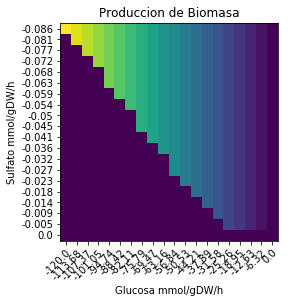

In [3]:
xlabels=np.unique(prod_env['Ex_91'])
ylabels=np.unique(prod_env["Ex_97"])

Xint=list(np.round_(xlabels,2))
Yint=list(np.round_(ylabels,3))

mat=np.zeros((20,20))
for i in range(20):
    mat[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]

fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(Xint)))
ax.set_yticks(np.arange(len(Yint)))

ax.set_xticklabels(Xint)
ax.set_yticklabels(Yint)   
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Produccion de Biomasa")
ax.set_ylabel("Sulfato mmol/gDW/h")
ax.set_xlabel("Glucosa mmol/gDW/h")
mat[np.isnan(mat)]=0
ax.imshow(mat)
fig.colorbar(im)

In [ ]:
X      = np.unique(-1*prod_env["Ex_91"])     
Y      = np.unique(-1*prod_env["Ex_97"])         
data_Z = prod_env["flux_maximum"]


num_dat= len(X)                                  
matriz = np.zeros((num_dat,num_dat))
for i in range(num_dat):
    matriz[i,:] = data_Z[num_dat*i:num_dat*(i+1)]
matriz[np.isnan(matriz)] = 0.0                   



fig  = plt.figure()
ax   = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, matriz, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.cm.CMRmap)

ax.view_init(elev =None, azim =60)
ax.set_xlabel("Glucosa mmol/gDW/h")
ax.set_ylabel("Sulfato mmol/gDW/h")
ax.set_zlabel("Growth rate [1/h]")
plt.title("Produccion de Biomasa")


plt.show()

In [ ]:
X      = np.unique(-1*prod_env["Ex_91"])     
Y      = np.unique(-1*prod_env["Ex_97"]) 

# Crea una matrix en donde guardar los valores de u
mat=np.zeros((20,20))
for i in range(20):
    mat[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]
    
#Crea un heatmap de la matriz
fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(Xint)))
ax.set_yticks(np.arange(len(Yint)))
# ... and label them with the respective list entries
ax.set_xticklabels(Xint)
ax.set_yticklabels(Yint)    
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Biomase production")
ax.set_ylabel("NH4 [mmol/g/hr]")
ax.set_xlabel("Glucose [mmol/g/hr]")
mat[np.isnan(mat)]=0
im=ax.imshow(mat)
fig.colorbar(im)